# Construct plots of the tangential velocity distribution in function of radius within the disk, and compare to Keplerian velocity distribution

In [1]:
%load_ext autoreload  
%autoreload 2

### Importing packages

In [3]:
import math                     as math
import matplotlib.pyplot        as plt
import numpy as np
# import necessary plons scripts
import plons.AccrDisk           as ad

### Plot vt/vkepl ifo radius, if you want for several models for comparison

Orbital phase is  [1.999]  pi
Orbital phase is  [2.]  pi


/tmp/ipykernel_12052/3096974035.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_12052/3096974035.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
1016.19s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


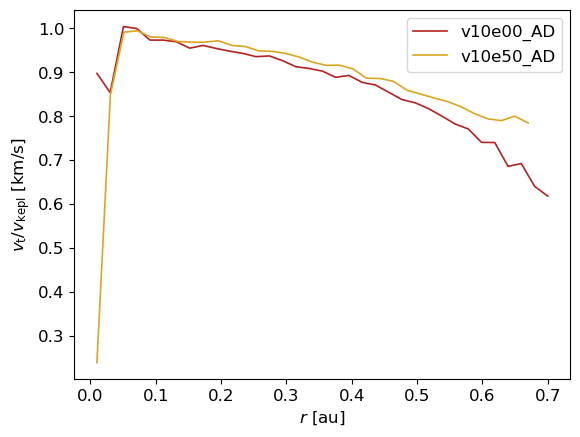

In [6]:
%matplotlib inline 
dump = 584
models = ['v10e00_AD','v10e50_AD']
rs  = [0.7,0.67]   #for crit03
colors = ['firebrick','goldenrod','navy']
loc = '/lhome/jolienm/Documents/TierModels/PlonsExampleModels/'
#rvalue to start from + also determines step for rr array
rstep = 0.02
rmin  = rstep/2
# rmin = 0.005
fig, ax = plt.subplots()

i = 0
for model in models:
    run    = str(loc)+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    rmax = rs[i]
    ad.plot_vt_divided_vtKepl(ax,rmax,rmin,rstep,dumpData,model,colors,i)
    i = i+1
ax.legend(fontsize = 12)
ax.set_xlabel(r'$r$ [au]',fontsize = 12)
ax.set_ylabel(r'$v_{\rm t}/v_{\rm kepl}$ [km/s]',fontsize = 12,rotation = 90)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
fig.show()
# make directory to save results in
wdir = os.path.join(loc,'plotsAnalysis/')
!mkdir -p $wdir

plt.savefig(loc+'plotsAnalysis/vt:vtKepl.png')
# plt.close()

### Plot vt, vkepl and 0.9vkepl ifo radius

Orbital phase is  [1.999]  pi
Orbital phase is  [2.]  pi


/tmp/ipykernel_12052/1276367016.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


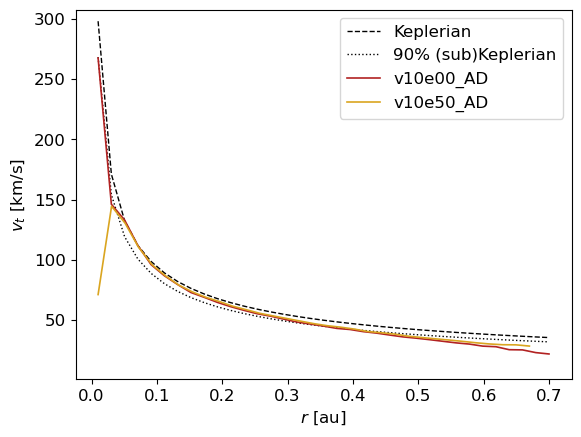

In [7]:
%matplotlib inline 
dump = 584
models = ['v10e00_AD','v10e50_AD']
rs  = [0.7,0.67]   
colors = ['firebrick','goldenrod','navy']
loc = '/lhome/jolienm/Documents/TierModels/PlonsExampleModels/'
fig, ax = plt.subplots()
rstep = 0.02
rmin  = rstep/2
lineStyles=['-','-','-','-']


k_vt   = np.array([])
r_vt_max = np.array([])
i = 0
for model in models:
    run    = str(loc)+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    rmax = rs[i]#-rstep/2
    r_vt_max = ad.plot_vt_vKepl(ax,rmax,rmin,rstep,dumpData,model,k_vt,r_vt_max,colors,lineStyles,i)
    i = i+1
ax.legend(fontsize = 12)
ax.set_xlabel(r'$r$ [au]',fontsize = 12)
ax.set_ylabel(r'$v_t$ [km/s]',fontsize = 12,rotation = 90)
ax.set_ylim(1,np.max(r_vt_max)+40)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
fig.show()
plt.savefig(loc+'plotsAnalysis/vt_vtKepl.png')
# plt.close()

### Plot the absolute value radial velocity, and the mean (not absolute value) radial velocity, in function of radius within the disk
This can be usefull to get an idea of the radial velocity values, and of the inward/outward general trend of the radial velocity

Orbital phase is  [1.999]  pi
Orbital phase is  [2.]  pi


/tmp/ipykernel_12052/3917441896.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/tmp/ipykernel_12052/3917441896.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


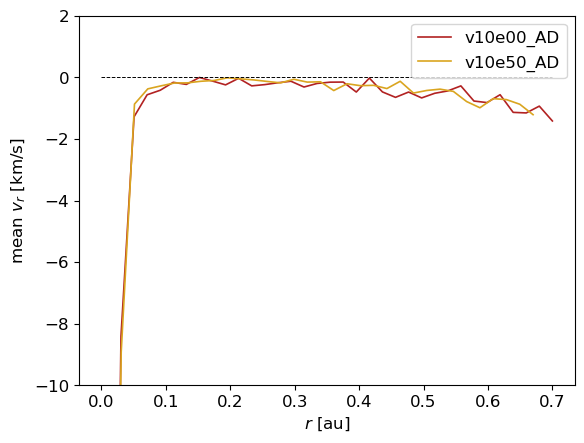

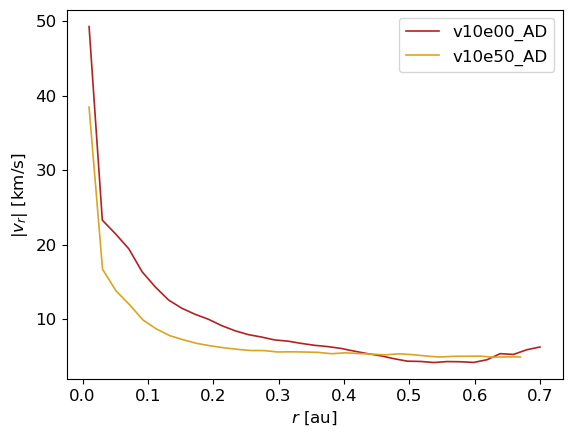

In [8]:
%matplotlib inline 
dump = 584
models = ['v10e00_AD','v10e50_AD']
colors = ['firebrick','goldenrod','navy']
loc = '/lhome/jolienm/Documents/TierModels/PlonsExampleModels/'
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
rstep = 0.02
rmin  = rstep/2
rs  = [0.7,0.67]   


i = 0
for model in models:
    run    = str(loc)+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    rmax = rs[i]#-rstep/2
    ad.plot_vrmean(ax1,ax2,rmax,rmin,rstep,dumpData,model,colors,i)
    i = i+1

ax1.hlines(0,0,np.max(rs),linewidth = 0.7,linestyle = '--',color = 'k') 
ax1.legend(fontsize = 12)
ax1.set_xlabel(r'$r$ [au]',fontsize = 12)
ax1.set_ylabel(r'mean $v_r$ [km/s]',fontsize = 12,rotation = 90)
ax1.set_ylim(-10,2)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
fig1.show()
fig1.savefig(loc+'plotsAnalysis/mean_vr.png')

ax2.legend(fontsize = 12)
ax2.set_xlabel(r'$r$ [au]',fontsize = 12)
ax2.set_ylabel(r'$|v_r|$ [km/s]',fontsize = 12,rotation = 90)
# ax1.set_ylim(-10,2)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
fig2.show()
fig2.savefig(loc+'plotsAnalysis/mean_abs_vr.png')
